# Analysis on CARAVAN dataset with different feature selection techniques
    Author : Francis Fan
    Date : 02/29/2019

# Overview 
    As the volumn of data explosively grows in modern society, people are becoming more incapable of handling these data themselves. Instead, people developed a bunch of useful tools on computer to help them understand the data. One of the most prevalent tool for analyzing data is Linear Regression model. 
    However, with only Linear Regression model, there are still many problems that might cause inaccurate result. One of the most common defect is the curse of dimensionality which is caused by overwhelming features and results in overfitting your data. 
    Today, we are going to use linear regression model on a caravan data set with different feature selection techniques to try to understand the underlying meaning of the dataset. We will perform an EDA first to see the overall relationships between factors and use linear regression with different feature selection methods to verify. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# feature selection using LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# forward/backward feature selection based on p-value
import statsmodels.api as sm

# feature selection based on low variance
from sklearn.feature_selection import VarianceThreshold

import os  


# Data
    This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. https://www.kaggle.com/uciml/caravan-insurance-challenge/home

In [2]:
df = pd.read_csv('caravan-insurance-challenge.csv')

# Exploratory Data Analysis 
    Since we are trying to understand the hidden relationships and correlations under the dataset, it is quite helpful for us to take a EDA on the dataset and have a good look of what might be going on. 

The first thing to look at is the dimensions of the dataset

In [3]:
df.shape

(9822, 87)

This dataset has 9822 records of diabetes patient. Each record has 87 elements, 86 variables and 1 result(CARAVAN).

Check whether there is null values in the dataset

In [4]:
df.isnull().values.any()

False

This dataset turns out to be quite clean without any missing value. I guess it is preprocessed by professional people and then uploaded. 

In [5]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


Build a histogram of target

<BarContainer object of 2 artists>

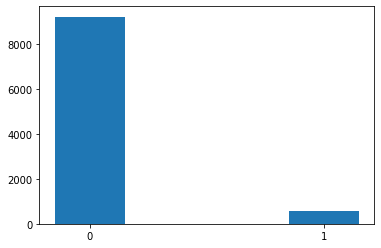

In [6]:
x = ["0", "1"]
height = [9822 - sum(df.CARAVAN), sum(df.CARAVAN)]
plt.bar(x = x, height = height, width = .3)


From the bar plot above, we can see that this data set is skewed. There are much more record with CARAVAN as 0 compared to CARAVAN as 1. Due to the lack of data on CARAVAN as 1, it is possible that we get inaccurate result. I will try to fit the model with the original data and fit the model with data corrected by sampling methods so that we can have a look of the difference. 

# Models
    The next step is to understand the dataset is to build some models and put the data in so that we can have a look about how can a computer interpret the data. For this assignment, I will use the linear regression model to find the underlying correlation. 

We are going to look at four different models with different techniques: 
    1. Logistic regression with all features (base model)
    2. Logistic regression with stepwise selection based on p-values
    3. Random Forest based on Principal component analysis feature selection
    4. Random Forest based on feature importance feature selection


### 1. Logistic regression with all features (base model)


In [14]:
df_n = df.drop(['ORIGIN'], axis=1)
y = df_n.CARAVAN
X = df_n.drop("CARAVAN", axis = 1)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

clf.score(X, y)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.940643453471798

The score of this model is seemingly high. However, it is quite faulty if we take a look at how many records are predicted as 1.

In [19]:
num_of_ones_predicted = sum(clf.predict(X))

num_of_ones = sum(y)
print("The number of 1s is : %d in dataset, the number of 1s is :%d in predicted values" % (num_of_ones, num_of_ones_predicted))

The number of 1s is : 586 in dataset, the number of 1s is :13 in predicted values


As we can see, this model did an awful job at recognizing a record as 1

2. Logistic regression with stepwise selection based on p-values

In [36]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.004, 
                       threshold_out = 0.004, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  PPERSAUT                       with p-value 2.14684e-42
Add  MKOOPKLA                       with p-value 1.36739e-21
Add  PWAPART                        with p-value 3.66711e-15
Add  APLEZIER                       with p-value 8.20766e-15
Add  MOPLHOOG                       with p-value 4.25236e-06
Add  PBRAND                         with p-value 3.92829e-06
Add  MBERBOER                       with p-value 8.31838e-06
Add  MRELGE                         with p-value 1.41977e-05
Add  PWALAND                        with p-value 0.000361295
Add  ABRAND                         with p-value 0.000937601
Add  AZEILPL                        with p-value 0.00153041
Add  MINK123M                       with p-value 0.00152554
Add  PBYSTAND                       with p-value 0.00243579
resulting features:
['PPERSAUT', 'MKOOPKLA', 'PWAPART', 'APLEZIER', 'MOPLHOOG', 'PBRAND', 'MBERBOER', 'MRELGE', 'PWALAND', 'ABRAND', 'AZEILPL', 'MINK123M', 'PBYSTAND']


In [37]:
len(result)

13

By running stepwise_selection on the original data, we can find the features that have a p-value indicating that it it possible important to predict the target. With threshold_in as 0.04 and threshold_out as 0.04, I am able to find 13 variables that contribute more to predicting the target. Then we can train the model with these important variables. 

In [38]:
X_stepwise_selected = df[result]

In [39]:
clf = LogisticRegression(random_state=0).fit(X_stepwise_selected, y)

clf.score(X_stepwise_selected, y)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9402362044390145

In [41]:
num_of_ones_predicted = sum(clf.predict(X_stepwise_selected))

num_of_ones = sum(y)
print("The number of 1s is : %d in dataset, the number of 1s is :%d in predicted values" % (num_of_ones, num_of_ones_predicted))

The number of 1s is : 586 in dataset, the number of 1s is :5 in predicted values


This model is even worse because it only predicted 5 records to be 1 while there are 586 1s in the dataset.

3. Random Forest based on Principal component analysis feature selection

In [51]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_pca, y)

clf.score(X_pca, y)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9403380166972104

In [52]:
num_of_ones_predicted = sum(clf.predict(X_pca))

num_of_ones = sum(y)
print("The number of 1s is : %d in dataset, the number of 1s is :%d in predicted values" % (num_of_ones, num_of_ones_predicted))

The number of 1s is : 586 in dataset, the number of 1s is :0 in predicted values


This model is even performing worse since It recognize no record as 1. 

4. Random Forest based on feature importance feature selection

To utilize the feature importance of each feature, we can put all the feature into a random forest model and then find the coefficient of each variables. 

In [53]:
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape        

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(9822, 17)

With feature importance technique, we can reduce the number of features down to 17 and then let's feed it into a new random forest model and see what the results are. 

In [55]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_new, y)

clf.score(X_new, y)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9403380166972104

In [56]:
num_of_ones_predicted = sum(clf.predict(X_new))

num_of_ones = sum(y)
print("The number of 1s is : %d in dataset, the number of 1s is :%d in predicted values" % (num_of_ones, num_of_ones_predicted))

The number of 1s is : 586 in dataset, the number of 1s is :0 in predicted values


# Conclusions

All of these four models did a good job on recognizing 0s. But when it comes to 1s, they all did an awful job. I suppose this problem is caused by the skewed property of target variable. 